<a href="https://colab.research.google.com/github/beingshub02/Deep-Learning-Summer-School-IIITDM/blob/main/25DLS455_week2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 2-Day 2 Assignment
Advanced CNNs – Transfer Learning and Pre-trained Models (ResNet, VGG)

**Q1. Load and Freeze VGG16**

In [1]:
# 📘 Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


**Q2. Compare Output Shapes of VGG16 and ResNet50**

Saving download.jpg to download.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

🔍 Q2 Results:
VGG16 Output Shape: (1, 7, 7, 512)
ResNet50 Output Shape: (1, 7, 7, 2048)


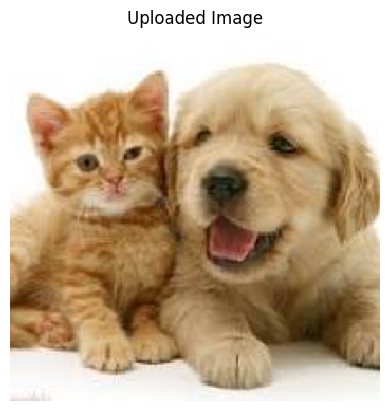

In [7]:
# ✅ Q2: Compare Output Shapes of VGG16 and ResNet50

# 📌 Step 1: Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# 📌 Step 2: Upload an image file
uploaded = files.upload()
img_path = next(iter(uploaded))  # Get filename

# 📌 Step 3: Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))        # Load image as PIL
img_array = image.img_to_array(img)                            # Convert to NumPy array
img_batch = np.expand_dims(img_array, axis=0)                  # Add batch dimension

# 🔄 Preprocess the image separately for VGG16 and ResNet50
img_vgg = vgg_preprocess(img_batch.copy())
img_resnet = resnet_preprocess(img_batch.copy())

# 📌 Step 4: Load pre-trained models (include_top=False)
vgg_model = VGG16(weights='imagenet', include_top=False)
resnet_model = ResNet50(weights='imagenet', include_top=False)

# 📌 Step 5: Pass image through both models
vgg_output = vgg_model.predict(img_vgg)
resnet_output = resnet_model.predict(img_resnet)

# 📌 Step 6: Print the feature map output shapes
print("\n🔍 Q2 Results:")
print("VGG16 Output Shape:", vgg_output.shape)
print("ResNet50 Output Shape:", resnet_output.shape)

# 📌 Step 7: Display the uploaded image (convert from array for plotting)
plt.imshow(img)   # PIL image works directly with plt.imshow()
plt.axis('off')
plt.title("Uploaded Image")
plt.show()


**Q3. Use ResNet50 for Classification**

Saving download.jpg to download (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


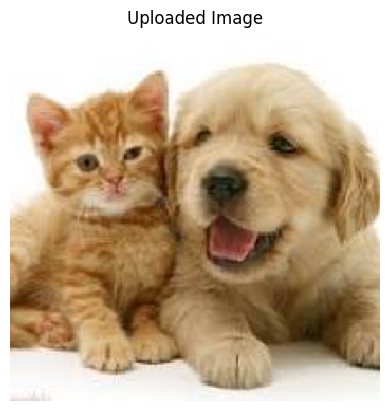


🔍 Q3 Results: Top 3 Predictions
1. golden_retriever (59.57%)
2. clumber (16.36%)
3. Labrador_retriever (7.91%)


In [8]:
# ✅ Q3: Use ResNet50 for Classification

# 📌 Step 1: Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# 📌 Step 2: Upload an image file
uploaded = files.upload()
img_path = next(iter(uploaded))  # Get uploaded file name

# 📌 Step 3: Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))      # PIL image
img_array = image.img_to_array(img)                          # Convert to NumPy array
img_batch = np.expand_dims(img_array, axis=0)                # Add batch dimension
img_preprocessed = preprocess_input(img_batch)               # Preprocess for ResNet50

# 📌 Step 4: Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=True)

# 📌 Step 5: Make predictions
predictions = model.predict(img_preprocessed)
top_preds = decode_predictions(predictions, top=3)[0]        # Decode top 3

# 📌 Step 6: Display the image (no .astype() needed)
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

# 📌 Step 7: Print top 3 predictions
print("\n🔍 Q3 Results: Top 3 Predictions")
for i, pred in enumerate(top_preds):
    print(f"{i+1}. {pred[1]} ({pred[2]*100:.2f}%)")
